# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

# Exploratory Data Analysis

In [47]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import numpy as np
import pandas as pd


df = pd.read_csv("data/toyota.csv")

In [48]:
df.head()
offshoot_df = df.copy()

In [4]:
df.shape

(6738, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [7]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.420959,-0.727749,0.283455,-0.020607,-0.045567
price,0.420959,1.000000,-0.297936,0.214498,-0.039910,0.727592
mileage,-0.727749,-0.297936,1.000000,-0.205285,0.044889,0.182615
tax,0.283455,0.214498,-0.205285,1.000000,-0.430292,0.155727
mpg,-0.020607,-0.039910,0.044889,-0.430292,1.000000,-0.106868
engineSize,-0.045567,0.727592,0.182615,0.155727,-0.106868,1.000000


In [8]:
df["fuelType"].value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

In [9]:
df["transmission"].value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [10]:
df["model"].value_counts()

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [11]:
df[["model","transmission"]].value_counts()

model           transmission
 Aygo           Manual          1693
 Yaris          Manual          1336
                Automatic        769
 Auris          Automatic        527
 C-HR           Automatic        394
 RAV4           Automatic        308
 Prius          Automatic        231
 Corolla        Automatic        185
 Auris          Manual           183
 RAV4           Manual           161
 Aygo           Semi-Auto        157
                Automatic        111
 Avensis        Manual            95
 C-HR           Manual            85
 Corolla        Manual            82
 Verso          Manual            65
 GT86           Manual            61
 Hilux          Manual            44
                Automatic         42
 Verso          Semi-Auto         32
 Land Cruiser   Semi-Auto         27
                Automatic         21
 Avensis        Automatic         18
 Verso          Automatic         17
 Yaris          Semi-Auto         16
 Camry          Automatic         11
 PROACE V

In [12]:
df[["model","fuelType"]].value_counts()

model           fuelType
 Aygo           Petrol      1902
 Yaris          Petrol      1533
                Hybrid       557
 Auris          Hybrid       498
 C-HR           Hybrid       352
 RAV4           Hybrid       230
 Prius          Hybrid       214
 Corolla        Hybrid       181
 RAV4           Diesel       180
 Auris          Petrol       171
 C-HR           Petrol       120
 Hilux          Diesel        86
 Verso          Petrol        83
 Corolla        Petrol        83
 Avensis        Diesel        76
 GT86           Petrol        73
 Aygo           Other         59
 RAV4           Petrol        58
 Land Cruiser   Diesel        51
 Auris          Diesel        42
 Avensis        Petrol        39
 Verso          Diesel        29
 Yaris          Diesel        22
 Prius          Other         18
 PROACE VERSO   Diesel        15
 Supra          Petrol        11
 Camry          Hybrid        11
 Yaris          Other         10
 IQ             Petrol         8
 C-HR           Ot

Noticings:

- Most cars between years 2016 and 2018
- Most prices between 5000 and 20000
- Most milage between 10k and 30k
- Most mpg betwen 50 and 70 most engin size between 1 and 2
- Price most strongly correlated with engine size and year (new car and bigger car = more expensive)
- Strong correlation between year and mileage (longer the car is on the road, the lower the price
- Most cars are petrol and hybrid
- No missing data


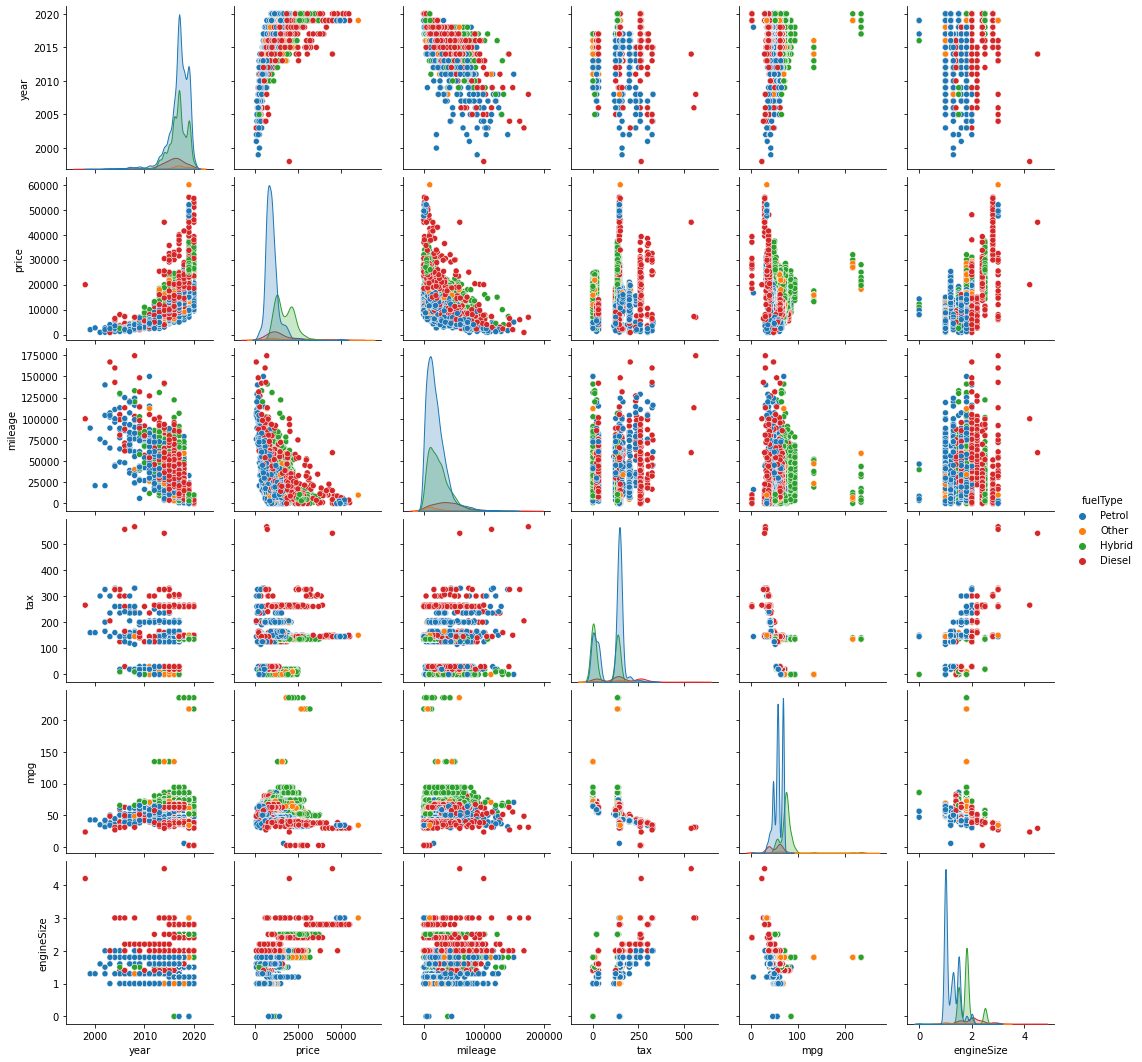

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue = "fuelType")

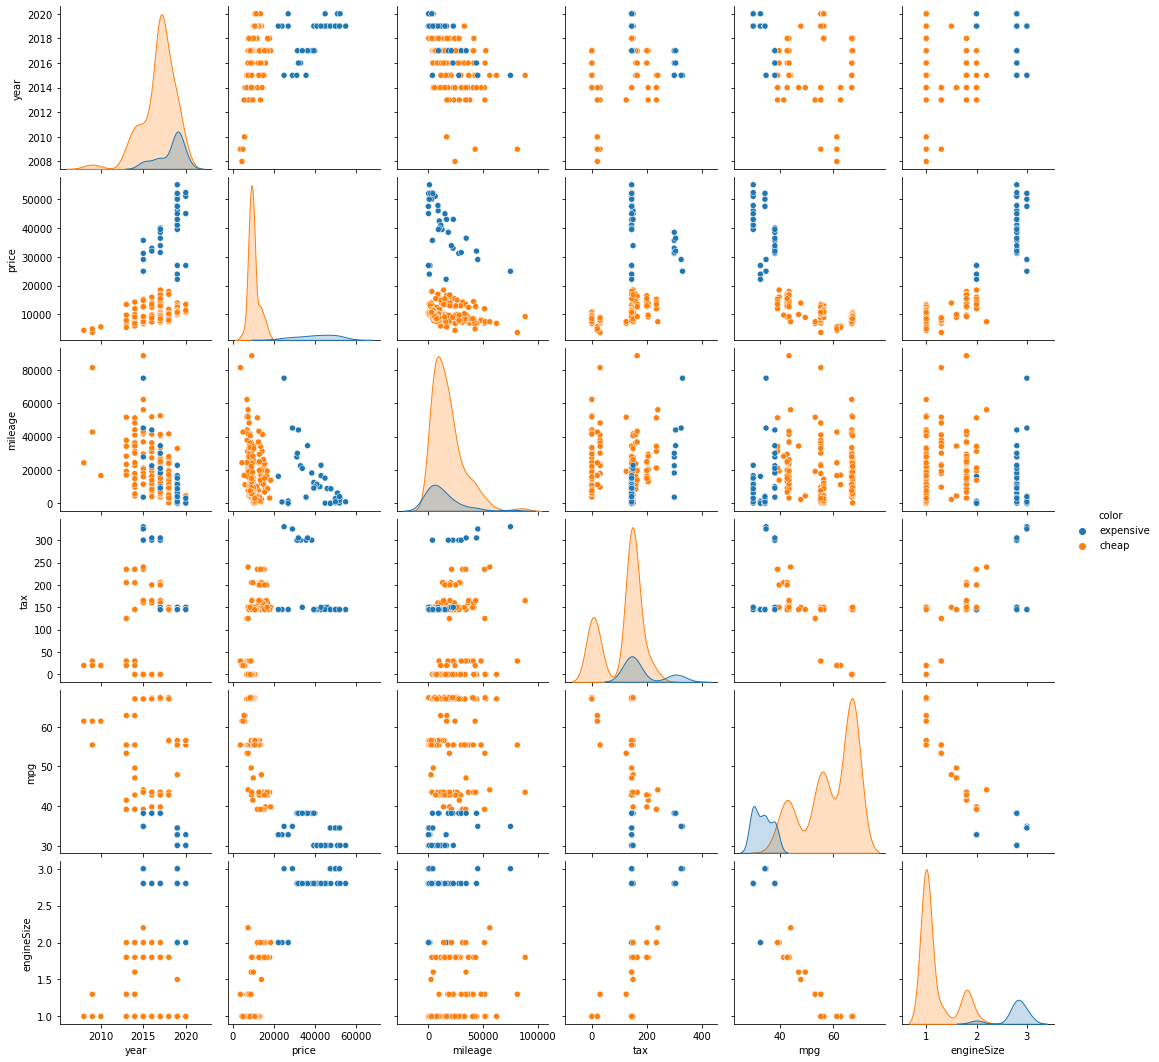

In [14]:
# In EDA in tableau, I noticed that all of the expensive cars are Semi-Autos, and below I noticed that my residuals are largest for expensive cars, so I wanted to explore that more.

temp = df[df["transmission"] == "Semi-Auto"]
temp["color"] = temp["price"].apply(lambda x: "expensive" if x>20000 else "cheap")
sns.pairplot(temp, hue = "color")

# we see some clear seperation

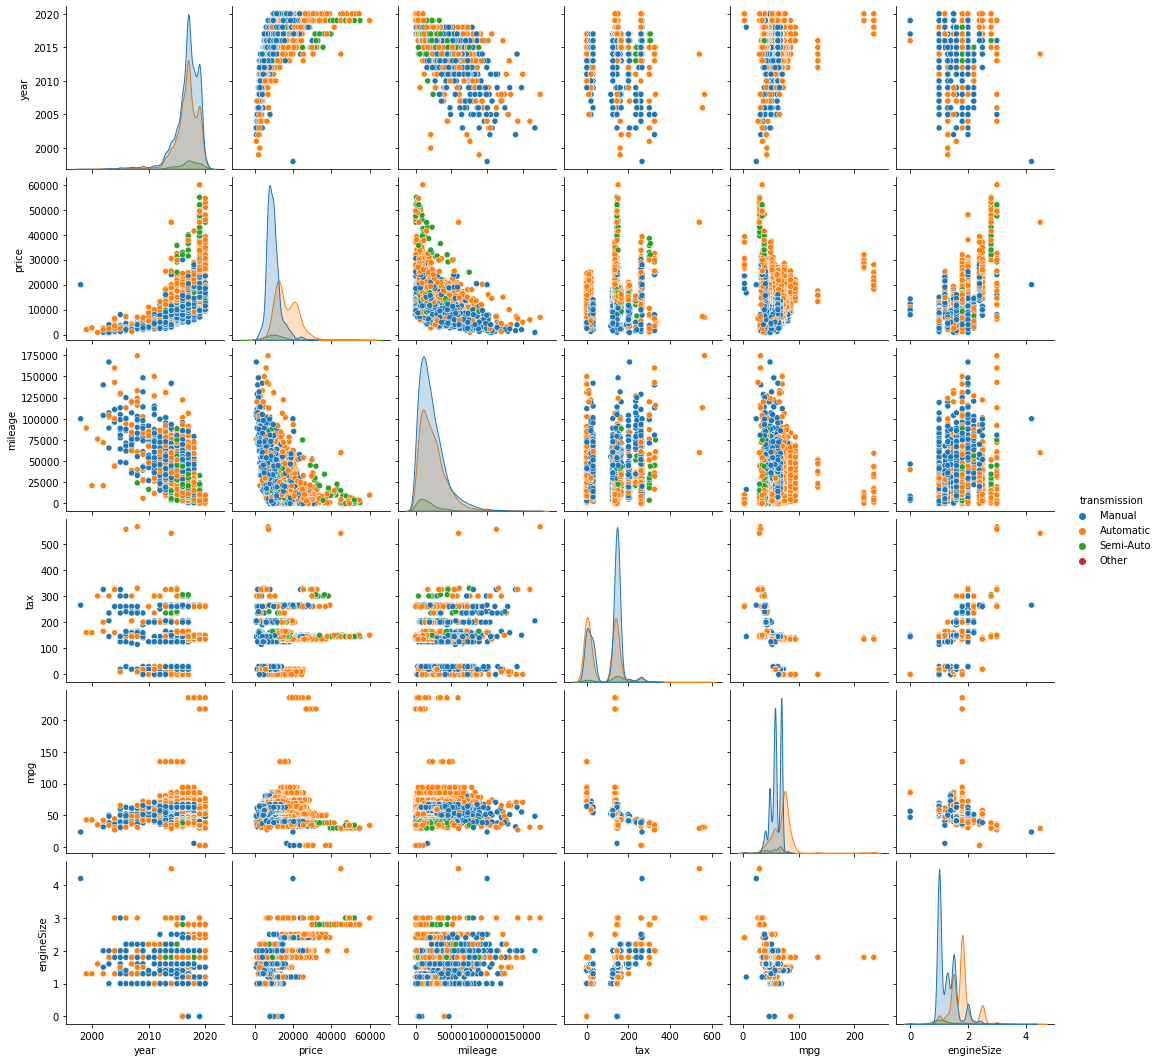

In [15]:
sns.pairplot(df, hue = "transmission")

Noticings:

- polynomial relationships between year and price, milage and price
- tax has two major points
- engine size, price, mileage is right skewed (most engines have a base small size, bigger ones are gradually bigger, same with milage)
- year is left skewed (most cars are newer, older ones die off slowly)
- hybrids better at mpg (duh)
- Most diesel and hybrid cars cost more than a gas car
- Deisel and and hybrid cars are generally larger than gas car
- manual transmission has lower gas mileage and engine size, as well as price

# Feature Engineering
- categorical:
    - fuel type
    - model
    - transmission
- polynomials:
    - year
    - mileage
- log:
    - engine size
- interaction:
    - manual * mpg (from pairplot)
    - engine size * mpg (from pairplot)
    - engine size * fuel (from pairplot)
    - engine size * hybrid (from eda)
    - milage * manual (from eda)
    - mpg * fuel (from eda)
    - semi-auto interactions

In [16]:
#create fuel dummies
fuel_dummies = pd.get_dummies(df["fuelType"], prefix = "Fuel" , drop_first = True)
df[fuel_dummies.columns] = fuel_dummies
df.drop("fuelType", axis = 1, inplace = True)


In [17]:
#create model dummies
model_dummies = pd.get_dummies(df["model"], prefix = "Model" , drop_first = True)
df[model_dummies.columns] = model_dummies
df.drop("model", axis = 1, inplace = True)

In [18]:
#create transmission dummies
transmission_dummies = pd.get_dummies(df["transmission"], prefix = "Transmission" , drop_first = True)
df[transmission_dummies.columns] = transmission_dummies
df.drop("transmission", axis = 1, inplace = True)

In [19]:
#set years to start at 0
df["year"] = df["year"]-df["year"].min()

In [20]:
#polynomial features
df["year2"] = df["year"]**2
df["milage2"] = df["mileage"]**2
df["engine2"] = df["engineSize"]**2

In [21]:
df["log_engine"] = np.log(df["engineSize"]+1)

In [22]:
df["manual_mpg"] = df["Transmission_Manual"]*df["mpg"]

In [23]:
df["engine_mpg"] = df["engineSize"]*df["mpg"]

In [24]:
df["engine_fuel"] = df["engineSize"]*df["Fuel_Hybrid"]

In [25]:
df["mileage_transmission"] = df["mileage"]*df["Transmission_Manual"]

In [26]:
df["mpg_fuel"] = df["mpg"]*df["Fuel_Petrol"]

In [27]:
df["semi_year"] = df["Transmission_Semi-Auto"]*df["year"]
df["semi_mileage"] = df["Transmission_Semi-Auto"]*df["mileage"]

In [28]:
df["manual_year"] = df["Transmission_Manual"]*df["year2"]

# Modeling

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
scaler = StandardScaler()

#X values are scaled and fit before splitting to allow for comparison

X = scaler.fit_transform(df.drop("price", axis = 1).values)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
lm.score(X_test, y_test)

#initial score is hopeful

0.9378406366349304

In [33]:
np.mean(cross_val_score(lm, X_train, y_train, cv = 5, scoring = "r2" )[1:])

#cross val supports it

0.9308734550456782

In [34]:
y_pred = lm.predict(X_test)
resid = y_pred-y_test
MAE = resid.abs().sum()/len(resid)
RMSE = ((resid ** 2).sum() / len(resid))**0.5
print(MAE)
print(RMSE)

#error is tolerable!

1094.694701049312
1626.4287618559886


Text(0, 0.5, 'model error')

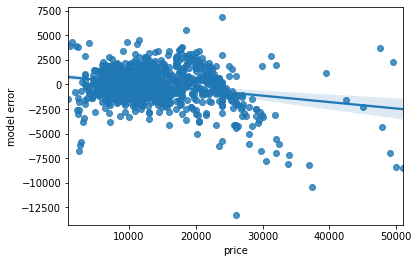

In [35]:
sns.regplot(x = y_test, y = resid)
plt.ylabel("model error")

# our model is within $5000 accuacy until the car gets expensive, then it drops off

In [36]:
# Let's try lasso and ridge

alphavec = 10**np.linspace(-2,2,500)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X, y)

a=lasso_model.alpha_
lasso_model = Lasso(alpha =a)
lasso_model.fit(X, y)
list(zip(df.drop("price", axis = 1).columns, lasso_model.coef_))

[('year', 0.0),
 ('mileage', -1078.5327807456795),
 ('tax', -132.095254101037),
 ('mpg', -0.0),
 ('engineSize', 0.0),
 ('Fuel_Hybrid', 0.0),
 ('Fuel_Other', 0.0),
 ('Fuel_Petrol', -0.0),
 ('Model_ Avensis', -29.336973427515407),
 ('Model_ Aygo', -908.351576286447),
 ('Model_ C-HR', 1195.2838761545618),
 ('Model_ Camry', 0.13108818896855196),
 ('Model_ Corolla', 670.2794182745964),
 ('Model_ GT86', 361.1678371526499),
 ('Model_ Hilux', 148.71360349752814),
 ('Model_ IQ', 0.0),
 ('Model_ Land Cruiser', 1050.6900098798076),
 ('Model_ PROACE VERSO', 356.73921668597393),
 ('Model_ Prius', 693.6530397640774),
 ('Model_ RAV4', 247.66470579316675),
 ('Model_ Supra', 840.0140106724656),
 ('Model_ Urban Cruiser', -0.0),
 ('Model_ Verso', -0.0),
 ('Model_ Verso-S', 0.0),
 ('Model_ Yaris', -593.163273613933),
 ('Transmission_Manual', -0.0),
 ('Transmission_Other', 0.0),
 ('Transmission_Semi-Auto', -0.0),
 ('year2', 1988.6998742051344),
 ('milage2', -25.696412582014148),
 ('engine2', 2568.181936247

In [37]:
# Let's try lasso and ridge

alphavec = 10**np.linspace(-2,2,500)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X, y)

a=ridge_model.alpha_
ridge_model = Ridge(alpha =a)
ridge_model.fit(X, y)
list(zip(df.drop("price", axis = 1).columns, ridge_model.coef_))

[('year', 76.9672586876269),
 ('mileage', -1454.768373161548),
 ('tax', -377.0678850247554),
 ('mpg', -124.54397404536186),
 ('engineSize', 498.3644123838631),
 ('Fuel_Hybrid', 338.39006130590826),
 ('Fuel_Other', 269.5337683289392),
 ('Fuel_Petrol', 726.1039302304918),
 ('Model_ Avensis', 87.27187581311318),
 ('Model_ Aygo', -1380.0304038589013),
 ('Model_ C-HR', 1270.8846932102972),
 ('Model_ Camry', 184.44587120691114),
 ('Model_ Corolla', 764.7662419876451),
 ('Model_ GT86', 646.3501773686907),
 ('Model_ Hilux', 856.6837295044841),
 ('Model_ IQ', -30.233687323418835),
 ('Model_ Land Cruiser', 1848.4034195238282),
 ('Model_ PROACE VERSO', 579.3817415433733),
 ('Model_ Prius', 888.9404621376242),
 ('Model_ RAV4', 1027.1506620913985),
 ('Model_ Supra', 1209.746069747579),
 ('Model_ Urban Cruiser', -15.574838632484587),
 ('Model_ Verso', 135.90564154389637),
 ('Model_ Verso-S', 4.578126038814108),
 ('Model_ Yaris', -763.7989962085852),
 ('Transmission_Manual', -296.0696643508592),
 ('T

<Figure size 7200x4800 with 0 Axes>

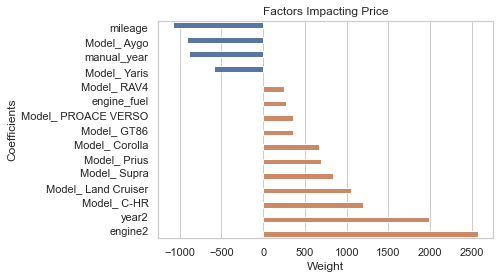

In [38]:
# We'll stick with LASSO

coefs = pd.DataFrame(list(zip(df.drop("price", axis = 1).columns, lasso_model.coef_)), columns = ["Coefficients","Weight"])
coefs["Direction"] = coefs["Weight"]>0
coefs = coefs[coefs["Weight"].abs()>200]
coefs.sort_values("Weight", inplace = True)
plt.figure(dpi=1200)
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
g = sns.barplot(x = "Weight", y = "Coefficients", data = coefs, hue= "Direction", orient = "h").set(title = "Factors Impacting Price")

ax.legend().remove()

In [43]:
y_pred = lasso_model.predict(X_test)
resid = y_pred-y_test
MAE = resid.abs().sum()/len(resid)
RMSE = ((resid ** 2).sum() / len(resid))**0.5
print(MAE)
print(RMSE)

1172.9897298380326
1785.8446053665998


In [50]:
# finding 3 examples - create df
example_df = offshoot_df.copy()
example_df["prediction"] = lasso_model.predict(X)
example_df["error"] = (example_df["prediction"]-example_df["price"]).abs()

In [40]:
# tableau workbook with visualizations can be found here: https://public.tableau.com/views/DataCampToyota/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [62]:
example_df.sort_values("error").iloc[1,:]

model                   RAV4
year                    2017
price                  22495
transmission       Automatic
mileage                20431
fuelType              Hybrid
tax                       20
mpg                     57.6
engineSize               2.5
prediction      22495.220593
error               0.220593
Name: 777, dtype: object